**Introduction:**

I have opted for the ParkMetric provided by the Pittsburgh Parking Authority as my chosen metric. This dataset offers insights into crucial aspects like the number of parking spots in each community, average parking rates, and the proximity of these neighborhoods to the University. In a city where owning a car is often a necessity for convenient transportation, the availability of parking spaces and associated costs become pivotal factors. The ParkMetric provides a holistic perspective for residents, enabling them to make informed decisions based on the interplay of parking convenience, affordability, and proximity to essential locations like the University.

In [4]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('ParkMetric.csv')

# Clean and convert the 'rates' column to numeric
df['rates'] = df['rates'].replace('[\$,]', '', regex=True).astype(float)

# Identify and handle variations in missing values in the 'node' column
missing_values = ['', ' ', 'NA', 'nan']  # Add other potential representations
df['node'] = df['node'].replace(missing_values, pd.NA)

# Drop rows where 'node' is missing or empty
df = df.dropna(subset=['node'])

# Group by 'node' and calculate the average rates for each node
average_rates = df.groupby('node')['rates'].mean().reset_index()

# Sort the DataFrame by average rates in descending order
average_rates = average_rates.sort_values(by='rates', ascending=False)

# Add a 'rank' column based on the sorted order
average_rates['Rank'] = range(1, len(average_rates) + 1)

# Reset the index based on the sorted order
average_rates.reset_index(drop=True, inplace=True)

# Display the DataFrame with average rates and ranks
print(average_rates)

             node     rates  Rank
0        Downtown  4.000000     1
1     North Shore  3.000000     2
2         Oakland  2.929398     3
3          Uptown  1.500000     4
4   Strip Distri*  1.500000     5
5   Squirell Hill  1.500000     6
6    East Liberty  1.500000     7
7       ShadySide  1.500000     8
8       NorthSide  1.000000     9
9      South Side  1.000000    10
10      Allentown  1.000000    11
11      Beechview  1.000000    12
12  Mt. Washingt*  1.000000    13
13  Lawrenceville  1.000000    14
14        Carrick  1.000000    15
15      Brookline  1.000000    16
16     Bloomfield  1.000000    17
17       West End  1.000000    18


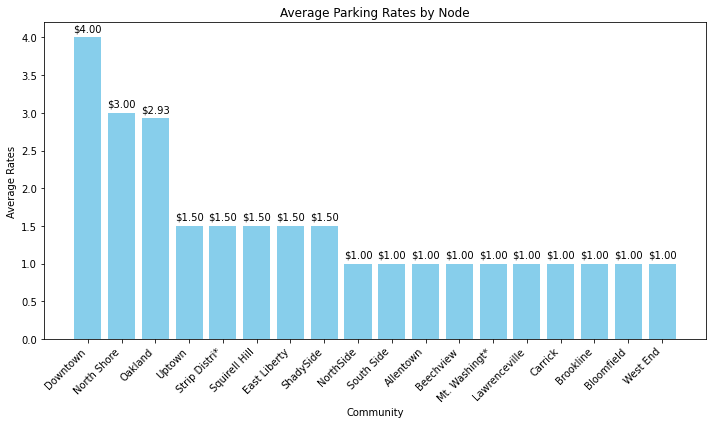

In [5]:
# Plot a bar graph
plt.figure(figsize=(10, 6))

# Add annotations with units on top of each bar
for i, rate in enumerate(average_rates['rates']):
    plt.text(i, rate + 0.05, f'${rate:.2f}', ha='center', va='bottom')

plt.bar(average_rates['node'], average_rates['rates'], color='skyblue')
plt.xlabel('Community')
plt.ylabel('Average Rates')
plt.title('Average Parking Rates by Node')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Rename the 'node' column to 'Community' before displaying
average_rates = average_rates.rename(columns={'node': 'Community'})

# Make the first letter uppercase
average_rates = average_rates.rename(columns={'rates': 'Rates'})

# Add unit to the 'Rates' column in the DataFrame
average_rates['Rates'] = average_rates['Rates'].apply(lambda x: f'${x:.2f}')

# Show the bar graph
plt.show()

In [6]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2

# Function to calculate Haversine distance between two sets of coordinates
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# Load the CSV file into a DataFrame
df = pd.read_csv('ParkMetric.csv')

# Clean and convert the 'rates' column to numeric
df['rates'] = df['rates'].replace('[\$,]', '', regex=True).astype(float)

# Identify and handle variations in missing values in the 'node' column
missing_values = ['', ' ', 'NA', 'nan']  # Add other potential representations
df['node'] = df['node'].replace(missing_values, pd.NA)

# Drop rows where 'node' is missing or empty
df = df.dropna(subset=['node'])

# Group by 'node' and calculate the average rates for each node
average_rates = df.groupby('node')['rates'].mean().reset_index()

# Sort the DataFrame by average rates in descending order
average_rates = average_rates.sort_values(by='rates', ascending=False)

# Add a 'rank_rates' column based on the sorted order of rates
average_rates['rank_rates'] = range(1, len(average_rates) + 1)

# University of Pittsburgh coordinates
pitt_lat, pitt_lon = 40.4440, -79.9605

# Calculate the distance from each node to the University of Pittsburgh
df['distance_to_pitt'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], pitt_lat, pitt_lon), axis=1)

# Group by 'node' and calculate the average distance for each node
average_distance = df.groupby('node')['distance_to_pitt'].mean().reset_index()

# Sort the DataFrame by average distance in ascending order
average_distance = average_distance.sort_values(by='distance_to_pitt')

# Add a 'rank_distance' column based on the sorted order of distance
average_distance['rank_distance'] = range(1, len(average_distance) + 1)

# Merge the two DataFrames on 'node'
merged_df = pd.merge(average_rates, average_distance, on='node')

# Sort the merged DataFrame by the rank of distance
merged_df = merged_df.sort_values(by='rank_distance')

# Format the 'rates' column with units
merged_df['rates'] = merged_df['rates']

# Reset the index based on the sorted order
merged_df.reset_index(drop=True, inplace=True)

# Display the merged DataFrame with ranks of rates and distances
print(merged_df)

             node     rates  rank_rates  distance_to_pitt  rank_distance
0         Oakland  2.929398           3          0.778902              1
1          Uptown  1.500000           4          2.006623              2
2      South Side  1.000000          10          2.243542              3
3      Bloomfield  1.000000          17          2.260131              4
4   Strip Distri*  1.500000           5          2.372830              5
5       ShadySide  1.500000           8          2.562978              6
6   Lawrenceville  1.000000          14          3.044971              7
7        Downtown  4.000000           1          3.392836              8
8   Squirell Hill  1.500000           6          3.393320              9
9    East Liberty  1.500000           7          3.517112             10
10      Allentown  1.000000          11          3.721475             11
11    North Shore  3.000000           2          4.082141             12
12      NorthSide  1.000000           9          4.

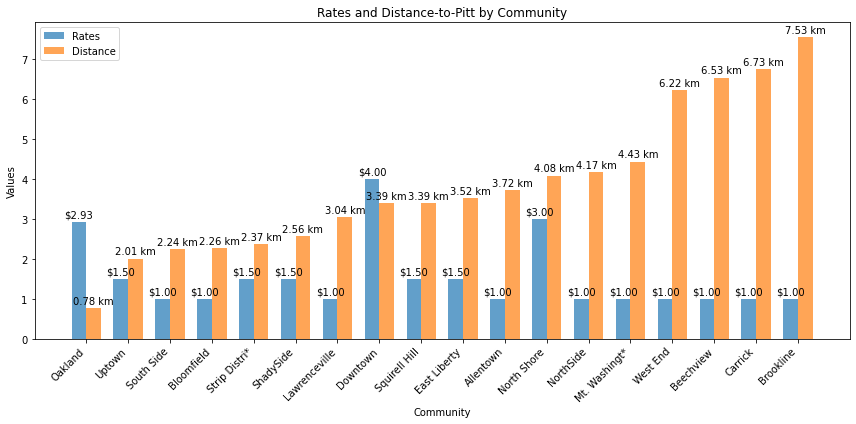

In [7]:
# Create a bar graph with annotations
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = range(len(merged_df))

bar1 = ax.bar(index, merged_df['rates'], bar_width, label='Rates', alpha=0.7)
bar2 = ax.bar([i + bar_width for i in index], merged_df['distance_to_pitt'], bar_width, label='Distance', alpha=0.7)

ax.set_xlabel('Community')
ax.set_ylabel('Values')
ax.set_title('Rates and Distance-to-Pitt by Community')

# Rotate x-axis labels
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(merged_df['node'], rotation=45, ha='right')

# Annotate bars with values
for i, rate in enumerate(merged_df['rates']):
    ax.text(i, rate + 0.05, f'${rate:.2f}', ha='center', va='bottom')

for i, distance in enumerate(merged_df['distance_to_pitt']):
    ax.text(i + bar_width, distance + 0.05, f'{distance:.2f} km', ha='center', va='bottom')

ax.legend()

plt.tight_layout()  # Adjust layout for better visualization
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('ParkMetric.csv')

# Identify and handle variations in missing values in the 'node' column
missing_values = ['', ' ', 'NA', 'nan']  # Add other potential representations
df['node'] = df['node'].replace(missing_values, pd.NA)

# Drop rows where 'node' is missing or empty
df = df.dropna(subset=['node'])

# Group by 'node' and count the number of entries for each node
parking_spot_counts = df.groupby('node').size().reset_index(name='Spots-Count')

# Sort the DataFrame by parking spot counts in descending order
parking_spot_counts = parking_spot_counts.sort_values(by='Spots-Count', ascending=False)

# Add a 'rank_parking_spots' column based on the sorted order of parking spot counts
parking_spot_counts['Parking-Spots-Rank'] = range(1, len(parking_spot_counts) + 1)

# Reset the index based on the sorted order
parking_spot_counts.reset_index(drop=True, inplace=True)

# Rename the 'node' column to 'Community' before displaying
parking_spot_counts = parking_spot_counts.rename(columns={'node': 'Community'})

# Display the DataFrame with parking spot counts and ranks
print(parking_spot_counts)

        Community  Spots-Count  Parking-Spots-Rank
0         Oakland          216                   1
1      South Side          109                   2
2        Downtown          104                   3
3       NorthSide           84                   4
4   Squirell Hill           69                   5
5       ShadySide           66                   6
6      Bloomfield           61                   7
7          Uptown           60                   8
8    East Liberty           59                   9
9   Strip Distri*           50                  10
10    North Shore           24                  11
11      Brookline           22                  12
12  Lawrenceville           15                  13
13  Mt. Washingt*           10                  14
14        Carrick            2                  15
15      Allentown            1                  16
16      Beechview            1                  17
17       West End            1                  18


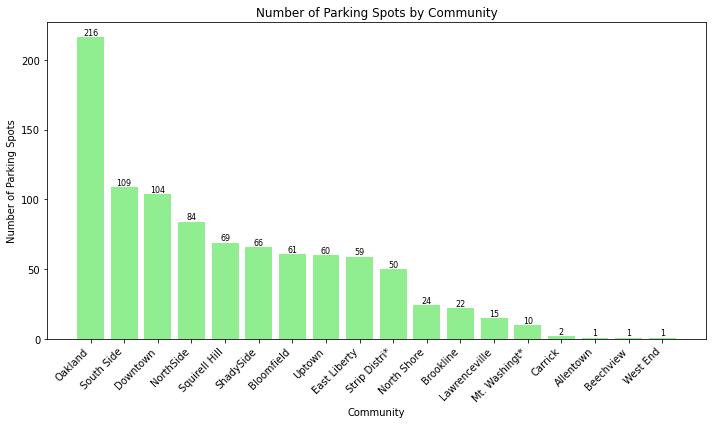

In [9]:
# Plot a bar graph
plt.figure(figsize=(10, 6))
plt.bar(parking_spot_counts['Community'], parking_spot_counts['Spots-Count'], color='lightgreen')
plt.xlabel('Community')
plt.ylabel('Number of Parking Spots')
plt.title('Number of Parking Spots by Community')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Label the digits on top of each bar
for i, count in enumerate(parking_spot_counts['Spots-Count']):
    plt.text(i, count + 0.05, f'{count}', ha='center', va='bottom', fontsize=8)

# Show the bar graph
plt.show()

Based on the metrics and rankings:

**Oakland:** It has the lowest average parking rates, the closest proximity to the University of Pittsburgh, and a high number of parking spots.

**Downtown:** Despite having the highest parking rates, it has a large number of parking spots, making it convenient for drivers.

**South Side:** It has a good balance of average parking rates and a significant number of parking spots.

**Conclusion:**

The data-driven determination of the "best neighborhood" in Pittsburgh, considering factors like parking rates, distance to the University of Pittsburgh, and the number of parking spots, provides a valuable analytical perspective. However, personal preferences can be heavily influenced by unique circumstances and experiences.

As a resident of Oakland, my personal favorite neighborhood aligns with the data-driven results. Oakland boasts not only competitive parking metrics but also a crucial factor for me—proximity to school. Living within a 30-minute walking distance from my school allows me to avoid the hassle of driving daily, especially in favorable weather conditions. This unique advantage, not explicitly captured by the metrics, significantly contributes to my positive perception of Oakland.

While data-driven approaches provide a standardized evaluation, personal experiences and individual needs often introduce subjective elements into the decision-making process. The data may reveal the overall efficiency of a neighborhood, but personal circumstances, such as the convenience of walking to school in my case, can heavily influence one's perception of the "best" neighborhood.

In conclusion, the synergy between objective data and personal experiences defines the ultimate appeal of a neighborhood. The data-driven determination lays a solid foundation, but it's the personal nuances that truly make a neighborhood feel like home.